In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from datetime import datetime

# Loading and parsing the CSV data
def load_and_process_data():
    # Assuming data is loaded from the provided CSV content
    # In practice, loadFileData("stocks_dataset.csv") would be used
    data = pd.read_csv('stocks_dataset.csv')

    # Converting Date to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Calculating daily returns
    returns = data.pct_change().dropna()
    return returns

# CAPM Analysis
def capm_analysis(returns, stock_symbol, market_symbol='sp500'):
    # Extracting stock and market returns
    stock_returns = returns[stock_symbol]
    market_returns = returns[market_symbol]

    # Preparing data for regression
    X = market_returns.values.reshape(-1, 1)
    y = stock_returns.values

    # Performing linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Getting alpha and beta
    alpha = model.intercept_
    beta = model.coef_[0]

    # Calculating R-squared using statsmodels for more detailed output
    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()

    return {
        'alpha': alpha,
        'beta': beta,
        'r_squared': model_sm.rsquared,
        'summary': model_sm.summary()
    }

# Multi-Factor Regression Analysis (using Fama-French 3-factor model as proxy)
def multi_factor_analysis(returns, stock_symbol, factors=['sp500']):
    # Extracting stock returns and factor returns
    stock_returns = returns[stock_symbol]
    factor_returns = returns[factors]

    # Preparing data for regression
    X = factor_returns.values
    y = stock_returns.values

    # Performing linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Getting coefficients
    alpha = model.intercept_
    betas = model.coef_

    # Calculating R-squared using statsmodels
    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()

    return {
        'alpha': alpha,
        'betas': dict(zip(factors, betas)),
        'r_squared': model_sm.rsquared,
        'summary': model_sm.summary()
    }

# Main execution
def main():
    # Loading data
    returns = load_and_process_data()

    # List of stocks to analyze
    stocks = ['FB', 'TWTR', 'NFLX', 'BA', 'T', 'MGM', 'TSLA']

    # Performing CAPM analysis for each stock
    print("CAPM Analysis Results:")
    capm_results = {}
    for stock in stocks:
        result = capm_analysis(returns, stock)
        capm_results[stock] = result
        print(f"\n{stock}:")
        print(f"Alpha: {result['alpha']:.6f}")
        print(f"Beta: {result['beta']:.6f}")
        print(f"R-squared: {result['r_squared']:.6f}")
        # Uncomment to print detailed summary
        # print(result['summary'])

    # Performing Multi-Factor analysis using SP500 and a subset of stocks as proxies
    print("\nMulti-Factor Analysis Results:")
    multi_factor_results = {}
    factors = ['sp500', 'FB', 'NFLX']  # Using SP500 and two stocks as proxy factors
    for stock in stocks:
        if stock not in factors[1:]:  # Avoid using the stock as its own factor
            result = multi_factor_analysis(returns, stock, factors)
            multi_factor_results[stock] = result
            print(f"\n{stock}:")
            print(f"Alpha: {result['alpha']:.6f}")
            print("Betas:")
            for factor, beta in result['betas'].items():
                print(f"  {factor}: {beta:.6f}")
            print(f"R-squared: {result['r_squared']:.6f}")
            # Uncomment to print detailed summary
            # print(result['summary'])

if __name__ == "__main__":
    main()

CAPM Analysis Results:

FB:
Alpha: 0.000737
Beta: 1.096848
R-squared: 0.362710

TWTR:
Alpha: -0.000039
Beta: 1.172360
R-squared: 0.145280

NFLX:
Alpha: 0.001273
Beta: 1.044570
R-squared: 0.192951

BA:
Alpha: -0.000184
Beta: 1.430461
R-squared: 0.420491

T:
Alpha: -0.000338
Beta: 0.752387
R-squared: 0.393025

MGM:
Alpha: -0.000302
Beta: 1.651713
R-squared: 0.408031

TSLA:
Alpha: 0.001372
Beta: 1.235969
R-squared: 0.172818

Multi-Factor Analysis Results:

TWTR:
Alpha: -0.000477
Betas:
  sp500: 0.639874
  FB: 0.350315
  NFLX: 0.141919
R-squared: 0.189412

BA:
Alpha: -0.000051
Betas:
  sp500: 1.586973
  FB: -0.097091
  NFLX: -0.047884
R-squared: 0.428008

T:
Alpha: -0.000200
Betas:
  sp500: 0.917778
  FB: -0.106490
  NFLX: -0.046515
R-squared: 0.421101

MGM:
Alpha: -0.000322
Betas:
  sp500: 1.599052
  FB: 0.073213
  NFLX: -0.026463
R-squared: 0.409818

TSLA:
Alpha: 0.000978
Betas:
  sp500: 0.819128
  FB: 0.189059
  NFLX: 0.200535
R-squared: 0.207838


CAPM Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     965.3
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.84e-168
Time:                        05:43:09   Log-Likelihood:                 4592.9
No. Observations:                1698   AIC:                            -9182.
Df Residuals:                    1696   BIC:                            -9171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007     

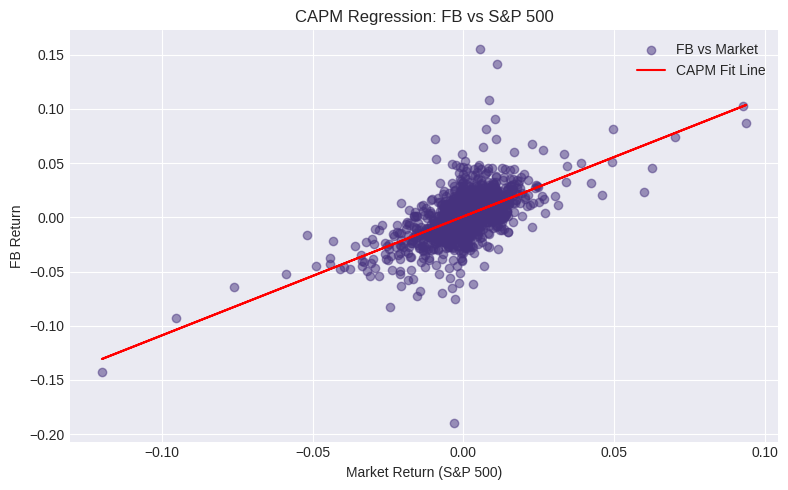


Multi-Factor Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 08 May 2025   Prob (F-statistic):          2.83e-144
Time:                        05:43:09   Log-Likelihood:                 4552.9
No. Observations:                1698   AIC:                            -9092.
Df Residuals:                    1691   BIC:                            -9054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

In [5]:
# Required Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stocks_dataset.csv")

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate daily returns
returns = df.drop(columns=['Date']).pct_change().dropna()

# =======================
# CAPM Regression (FB vs S&P500)
# =======================
Y_capm = returns['FB']           # Dependent variable: FB returns
X_capm = returns['sp500']        # Independent variable: Market returns

# Add constant for alpha
X_capm_const = sm.add_constant(X_capm)

# Fit CAPM model
capm_model = sm.OLS(Y_capm, X_capm_const).fit()
print("CAPM Regression Summary:\n", capm_model.summary())

# Plot CAPM Regression
plt.figure(figsize=(8, 5))
plt.scatter(X_capm, Y_capm, alpha=0.5, label='FB vs Market')
plt.plot(X_capm, capm_model.predict(X_capm_const), color='red', label='CAPM Fit Line')
plt.title('CAPM Regression: FB vs S&P 500')
plt.xlabel('Market Return (S&P 500)')
plt.ylabel('FB Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =======================
# Multi-Factor Regression
# =======================
# Use TWTR, NFLX, BA, T, MGM, TSLA to predict FB
factors = ['TWTR', 'NFLX', 'BA', 'T', 'MGM', 'TSLA']
X_multi = returns[factors]
X_multi_const = sm.add_constant(X_multi)
Y_multi = returns['FB']

# Fit multi-factor model
multi_model = sm.OLS(Y_multi, X_multi_const).fit()
print("\nMulti-Factor Regression Summary:\n", multi_model.summary())
